## <center><font color='black'>Dados Atuariais Simulados para Estudo e Análise com Programação</font><center>

## Descrição: 

#### Este projeto visa a criação e análise de um conjunto de dados atuariais simulados, com o objetivo de explorar conceitos fundamentais em ciência atuarial e finanças, utilizando Python para a simulação e manipulação dos dados. 

#### O foco principal está na geração de dados para provisões matemáticas, como Provisão Matemática de Benefícios Concedidos (PMBC) e Provisão Matemática de Benefícios a Conceder (PMBAC), permitindo uma compreensão prática do regime de capitalização e cálculo de provisões técnicas.

## Objetivos:

#### 1. Desenvolver uma base de dados fictícia para estudos atuariais.
#### 2. Implementar cálculos atuariais e simulações de provisões.
#### 3. Praticar técnicas de programação e análise de dados atuariais com Python.

## Contribuições: 

#### Este projeto é ideal para estudantes e profissionais que desejam aplicar programação para aprender conceitos atuariais de forma prática e interativa.

In [1]:
# Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Gerando dados ficticios - Perfil e Quantidade dos Segurados

In [2]:
# Definindo as premissas iniciais

idade_minima = 25  # Idade mínima dos segurados
idade_maxima = 64   # Idade máxima antes da aposentadoria
idade_aposentadoria = 65  # Idade em que começam os benefícios

In [3]:
# Valores para simulação

taxa_juros = 0.03  # 3% de taxa de juros anual para cálculos atuariais
valor_beneficio = 2000  # Valor mensal do benefício na fase de concessão
contribuicao_mensal = 500  # Valor da contribuição mensal na fase de acumulação

In [4]:
# Número de segurados simulados

num_segurados = 19870  # Número de segurados na simulação

In [5]:
# Gerando idades aleatórias para os segurados entre 25 e 65 anos

idades = np.random.randint(idade_minima, idade_aposentadoria + 1, num_segurados)

In [6]:
# Gerando idades de contratação aleatórias para os segurados

idades_contratacao = [
    np.random.randint(idade_minima, idade) if idade > idade_minima else idade_minima
    for idade in idades
]

In [7]:
# Definindo o estado de benefício para cada segurado com base na idade

estado_beneficio = np.where(idades < idade_aposentadoria, "PMBAC", "PMBC")

In [8]:
# Criando o DataFrame e adicionando a coluna Idade_Contratacao

dados_segurados = pd.DataFrame({
    "Idade": idades,
    "Idade_Contratacao": idades_contratacao,
    "Estado_Benefício": estado_beneficio
})

In [9]:
# Exibindo as primeiras linhas do Dataframe

dados_segurados.head()

,Idade,Idade_Contratacao,Estado_Benefício
0,28,26,PMBAC
1,49,30,PMBAC
2,59,28,PMBAC
3,62,40,PMBAC
4,58,42,PMBAC


## Da base criada

#### 1. Foi estabelecido uma idade mínimade de 25 anos para o início da contribuição e uma idade máxima de 64 anos para o termíno da contribuição.
#### 2. Ao completar 65 anos, o segurado começa a receber o benefício.
#### 3. Foi estabelecido uma taxa de juros de 3%.
#### 4. O valor do benefício a ser recebido é de 2.000,00 com uma contribuição de 500,00.
#### 5. Criação das colunas idade (idade atual) e idade na contratação.
#### 5. Simulação para 19.870 segurados

## Simulando as contribuições e benefícios (PMBAC e PMBC)

In [10]:
# Atribuindo valor de benefício com base no estado de benefício

dados_segurados["Benefício"] = np.where(
    dados_segurados["Estado_Benefício"] == "PMBC", valor_beneficio, 0
)

In [11]:
# Calculando o tempo restante até a aposentadoria em anos para os segurados em acumulação

dados_segurados["Tempo_Acumulação"] = np.where(
    dados_segurados["Estado_Benefício"] == "PMBAC", idade_aposentadoria - dados_segurados["Idade"], 0
)

In [12]:
# Convertendo o tempo de acumulação em meses

dados_segurados["Tempo_Acumulação_Meses"] = dados_segurados["Tempo_Acumulação"] * 12

In [13]:
# Definindo os meses mínimos para contribuição

meses_minimos = 240  # Exemplo: 20 anos

## Cálculo das provisões matemáticas de benefícios à conceder - PMBAC

In [14]:
# Atribuindo valor de contribuição ajustada com base na idade de contratação

dados_segurados["Contribuicao"] = np.where(
    dados_segurados["Estado_Benefício"] == "PMBAC",
    contribuicao_mensal * (1 + (idade_aposentadoria - dados_segurados["Idade_Contratacao"]) / (idade_aposentadoria - idade_minima)),
    0
)

In [15]:
# Verificando a nova coluna de Contribuição

print(dados_segurados[["Idade", "Idade_Contratacao", "Estado_Benefício", "Contribuicao"]].head())

   Idade  Idade_Contratacao Estado_Benefício  Contribuicao
0     28                 26            PMBAC         987.5
1     49                 30            PMBAC         937.5
2     59                 28            PMBAC         962.5
3     62                 40            PMBAC         812.5
4     58                 42            PMBAC         787.5


In [16]:
# Calculando a Provisão Matemática de Benefícios a Conceder (PMBAC)

dados_segurados["PMBAC"] = np.where(
    dados_segurados["Estado_Benefício"] == "PMBAC",
    dados_segurados["Contribuicao"] * ((1 + taxa_juros / 12) ** dados_segurados["Tempo_Acumulação_Meses"] / 12),
    0
)

In [17]:
# Exibindo as primeiras linhas para verificar a coluna PMBAC

dados_segurados[["Idade", "Estado_Benefício", "Contribuicao", "Tempo_Acumulação_Meses", "PMBAC"]].head()

,Idade,Estado_Benefício,Contribuicao,Tempo_Acumulação_Meses,PMBAC
0,28,PMBAC,987.5,444,249.356763
1,49,PMBAC,937.5,192,126.180208
2,59,PMBAC,962.5,72,96.005242
3,62,PMBAC,812.5,36,74.076397
4,58,PMBAC,787.5,84,80.938909


In [18]:
# Definindo o tempo de recebimento dos benefícios em anos (Exemplo: expectativa de 20 anos)

tempo_recebimento_anos = 20
tempo_recebimento_meses = tempo_recebimento_anos * 12

In [19]:
# Definindo o tempo de recebimento dos benefícios em anos (Exemplo: expectativa de 20 anos)

tempo_recebimento_anos = 20
tempo_recebimento_meses = tempo_recebimento_anos * 12

## Cálculo das provisões matemáticas de benefícios concedidos - PMBC

In [20]:
# Calculando a Provisão Matemática de Benefícios Concedidos (PMBC)

dados_segurados["PMBC"] = np.where(
    dados_segurados["Estado_Benefício"] == "PMBC",
    dados_segurados["Benefício"] * (1 - (1 + taxa_juros / 12) ** -tempo_recebimento_meses) / (taxa_juros / 12),
    0
)

In [21]:
# Exibindo as primeiras linhas para verificar a coluna PMBC

dados_segurados[["Idade", "Estado_Benefício", "Benefício", "PMBC"]].head()

,Idade,Estado_Benefício,Benefício,PMBC
0,28,PMBAC,0,0.0
1,49,PMBAC,0,0.0
2,59,PMBAC,0,0.0
3,62,PMBAC,0,0.0
4,58,PMBAC,0,0.0


In [22]:
# Filtrando segurados com benefícios concedidos para visualizar a PMBC

dados_segurados[dados_segurados["Estado_Benefício"] == "PMBC"].head()

,Idade,Idade_Contratacao,Estado_Benefício,Benefício,Tempo_Acumulação,Tempo_Acumulação_Meses,Contribuicao,PMBAC,PMBC
101,65,37,PMBC,2000,0,0,0.0,0.0,360621.828825
228,65,42,PMBC,2000,0,0,0.0,0.0,360621.828825
259,65,51,PMBC,2000,0,0,0.0,0.0,360621.828825
360,65,59,PMBC,2000,0,0,0.0,0.0,360621.828825
387,65,56,PMBC,2000,0,0,0.0,0.0,360621.828825


## Análise descritiva

In [23]:
# Resumo descritivo das provisões

resumo_provisoes = dados_segurados[["PMBAC", "PMBC"]].describe()
print(resumo_provisoes)

              PMBAC           PMBC
count  19870.000000   19870.000000
mean     145.174170    8275.971512
std       65.994245   54001.398491
min        0.000000       0.000000
25%       92.501610       0.000000
50%      134.874970       0.000000
75%      196.209734       0.000000
max      276.262396  360621.828825


In [24]:
# Contagem de segurados em cada estado de benefício

contagem_estado = dados_segurados["Estado_Benefício"].value_counts()
print(contagem_estado)

Estado_Benefício
PMBAC    19414
PMBC       456
Name: count, dtype: int64


In [25]:
# Calculando o total das provisões

total_pmbac = dados_segurados["PMBAC"].sum()
total_pmbc = dados_segurados["PMBC"].sum()

In [26]:
print(f'Total de PMBAC: {total_pmbac: .2f}')

Total de PMBAC:  2884610.76


In [27]:
print(f'Total de PMBC: {total_pmbc: .2f}')

Total de PMBC:  164443553.94


## Visualização gráfica

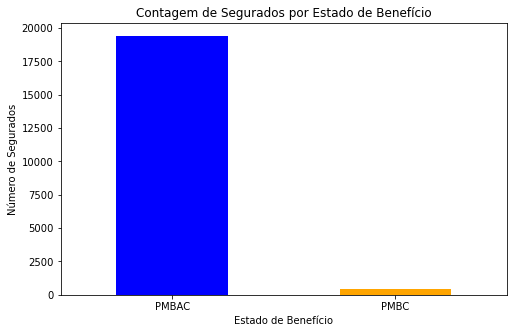

In [28]:
# Criando um gráfico de barras para a contagem de segurados em cada estado

plt.figure(figsize=(8, 5))
contagem_estado.plot(kind='bar', color=['blue', 'orange'])
plt.title('Contagem de Segurados por Estado de Benefício')
plt.xlabel('Estado de Benefício')
plt.ylabel('Número de Segurados')
plt.xticks(rotation=0)
plt.show()

## Análise de sensibilidade - Definindo cenários

In [29]:
# Valores de variação para taxa de juros e contribuição mensal

variacoes_taxa_juros = [taxa_juros * 0.95, taxa_juros, taxa_juros * 1.05]
variacoes_contribuicao = [contribuicao_mensal * 0.95, contribuicao_mensal, contribuicao_mensal * 1.05]

In [30]:
# Estruturando uma lista para armazenar os resultados de cada cenário

resultados_sensibilidade = []

In [31]:
# Executando as simulações para cada combinação de taxa de juros e contribuição mensal

for taxa in variacoes_taxa_juros:
    for contrib in variacoes_contribuicao:
        
        # Calculando PMBAC ajustado com taxa e contribuição ajustadas
        
        dados_segurados["PMBAC_Sens"] = np.where(
            dados_segurados["Estado_Benefício"] == "PMBAC", 
            contrib * ((1 + taxa / 12) ** dados_segurados["Tempo_Acumulação_Meses"] / 12), 
            0
        )
        
        # Calculando o total da PMBAC ajustada para o cenário
        
        total_pmbac_sens = dados_segurados["PMBAC_Sens"].sum()
        
        # Salvando o resultado do cenário
        
        resultados_sensibilidade.append({
            "Taxa_Juros": taxa,
            "Contribuicao": contrib,
            "Total_PMBAC_Sens": total_pmbac_sens
        })

In [32]:
# Convertendo os resultados para um DataFrame para fácil visualização

resultados_df = pd.DataFrame(resultados_sensibilidade)

In [33]:
# Exibindo os resultados

print(resultados_df)

   Taxa_Juros  Contribuicao  Total_PMBAC_Sens
0      0.0285         475.0      1.454161e+06
1      0.0285         500.0      1.530696e+06
2      0.0285         525.0      1.607231e+06
3      0.0300         475.0      1.508095e+06
4      0.0300         500.0      1.587468e+06
5      0.0300         525.0      1.666841e+06
6      0.0315         475.0      1.564456e+06
7      0.0315         500.0      1.646796e+06
8      0.0315         525.0      1.729136e+06


## Análise dos resultados

#### 1. Taxa de Juros: À medida que a taxa de juros aumenta, o valor total do PMBAC também aumenta. Isso ocorre porque um aumento na taxa de juros gera uma valorização dos fundos acumulados, refletindo um crescimento nas reservas.

#### 2. Contribuição Mensal: A contribuição mensal também tem um impacto direto e linear no valor total da provisão. Quando ela aumenta, o total do PMBAC aumenta, o que faz sentido, já que o montante contribuído diretamente afeta o saldo acumulado.

## Adicionando a tabela de mortalidade

In [34]:
# Definindo uma tabela de mortalidade simulada para cada idade
# Probabilidades de sobrevivência até a idade de aposentadoria (exemplo simplificado)

tabela_mortalidade = {
    idade: max(0, 1 - 0.01 * (idade - idade_minima)) for idade in range(idade_minima, idade_aposentadoria + 1)
}

In [35]:
# Exibindo a tabela de mortalidade simulada

print("Tabela de Mortalidade Simulada (Probabilidade de Sobrevivência):")
print()
for idade, probabilidade in tabela_mortalidade.items():
    print(f"Idade: {idade}, Probabilidade de Sobrevivência: {probabilidade:.2f}")

Tabela de Mortalidade Simulada (Probabilidade de Sobrevivência):

Idade: 25, Probabilidade de Sobrevivência: 1.00
Idade: 26, Probabilidade de Sobrevivência: 0.99
Idade: 27, Probabilidade de Sobrevivência: 0.98
Idade: 28, Probabilidade de Sobrevivência: 0.97
Idade: 29, Probabilidade de Sobrevivência: 0.96
Idade: 30, Probabilidade de Sobrevivência: 0.95
Idade: 31, Probabilidade de Sobrevivência: 0.94
Idade: 32, Probabilidade de Sobrevivência: 0.93
Idade: 33, Probabilidade de Sobrevivência: 0.92
Idade: 34, Probabilidade de Sobrevivência: 0.91
Idade: 35, Probabilidade de Sobrevivência: 0.90
Idade: 36, Probabilidade de Sobrevivência: 0.89
Idade: 37, Probabilidade de Sobrevivência: 0.88
Idade: 38, Probabilidade de Sobrevivência: 0.87
Idade: 39, Probabilidade de Sobrevivência: 0.86
Idade: 40, Probabilidade de Sobrevivência: 0.85
Idade: 41, Probabilidade de Sobrevivência: 0.84
Idade: 42, Probabilidade de Sobrevivência: 0.83
Idade: 43, Probabilidade de Sobrevivência: 0.82
Idade: 44, Probabilida

In [36]:
# Calculando a PMBAC ajustada pela probabilidade de sobrevivência

dados_segurados["Prob_Sobrevivencia"] = dados_segurados["Idade"].map(tabela_mortalidade)

In [37]:
# PMBAC ajustada pela probabilidade de sobrevivência

dados_segurados["PMBAC_Ajustada"] = dados_segurados["PMBAC"] * dados_segurados["Prob_Sobrevivencia"]

In [38]:
# Exibindo o DataFrame atualizado com as colunas de Probabilidade de Sobrevivência e PMBAC Ajustada

print(dados_segurados[["Idade", "Estado_Benefício", "Contribuicao", "PMBAC", "Prob_Sobrevivencia", "PMBAC_Ajustada"]].head())

   Idade Estado_Benefício  Contribuicao       PMBAC  Prob_Sobrevivencia  \
0     28            PMBAC         987.5  249.356763                0.97   
1     49            PMBAC         937.5  126.180208                0.76   
2     59            PMBAC         962.5   96.005242                0.66   
3     62            PMBAC         812.5   74.076397                0.63   
4     58            PMBAC         787.5   80.938909                0.67   

   PMBAC_Ajustada  
0      241.876060  
1       95.896958  
2       63.363460  
3       46.668130  
4       54.229069  


## Simulando cenários de aposentadoria antecipada e atrasada -  ajustando o cálculo do benefício para considerar diferentes idades de aposentadoria.

In [39]:
# Definindo os anos de antecipação e postergação de aposentadoria

anos_antecipacao = 5
anos_postergacao = 5

In [40]:
# Calculando a PMBAC para cenários de aposentadoria antecipada e postergada

dados_segurados["PMBAC_Anticipada"] = dados_segurados.apply(
    lambda row: row["PMBAC_Ajustada"] * (1 - 0.05 * anos_antecipacao) if row["Idade"] + anos_antecipacao < idade_aposentadoria else row["PMBAC_Ajustada"],
    axis=1
)

dados_segurados["PMBAC_Posterior"] = dados_segurados.apply(
    lambda row: row["PMBAC_Ajustada"] * (1 + 0.05 * anos_postergacao) if row["Idade"] + anos_postergacao >= idade_aposentadoria else row["PMBAC_Ajustada"],
    axis=1
)

In [41]:
# Exibindo os primeiros resultados para visualização

print(dados_segurados[["Idade", "Estado_Benefício", "Contribuicao", "PMBAC_Ajustada", "PMBAC_Anticipada", "PMBAC_Posterior"]].head())

   Idade Estado_Benefício  Contribuicao  PMBAC_Ajustada  PMBAC_Anticipada  \
0     28            PMBAC         987.5      241.876060        181.407045   
1     49            PMBAC         937.5       95.896958         71.922718   
2     59            PMBAC         962.5       63.363460         47.522595   
3     62            PMBAC         812.5       46.668130         46.668130   
4     58            PMBAC         787.5       54.229069         40.671802   

   PMBAC_Posterior  
0       241.876060  
1        95.896958  
2        63.363460  
3        58.335163  
4        54.229069  


## Análise dos resultados

#### Aplicando um ajuste de 5% a cada ano para antecipação (redução de valor) e postergação (aumento de valor).

#### Isso oferece uma visão sobre como mudanças na idade de aposentadoria podem impactar o valor ajustado da provisão.

## Preparação das variáveis de contribuição

In [42]:
# Parâmetros iniciais

num_segurados = 19870  # Total de segurados
anos_contribuicao = 30  # Período de contribuição
salario_inicial = 3000  # Salário inicial dos segurados
taxa_aumento_salarial = 0.03  # Crescimento anual de 3%
taxa_contribuicao = 0.10  # 10% de contribuição sobre o salário

In [43]:
# Gerando o DataFrame com anos, salário e contribuição

dados = pd.DataFrame({
    'Ano': range(1, anos_contribuicao + 1),
    'Salario': [salario_inicial * (1 + taxa_aumento_salarial) ** i for i in range(anos_contribuicao)]
})
dados['Contribuicao'] = dados['Salario'] * taxa_contribuicao

In [44]:
# Exibindo as primeiras linhas do Dataframe

print(dados.head())

   Ano     Salario  Contribuicao
0    1  3000.00000    300.000000
1    2  3090.00000    309.000000
2    3  3182.70000    318.270000
3    4  3278.18100    327.818100
4    5  3376.52643    337.652643


In [45]:
# Definindo a taxa de juros anual

taxa_juros_anual = 0.05 # 5% ao ano

In [46]:
saldo_acumulado = 0
dados['Saldo_Acumulado'] = 0

In [47]:
# Calculando o saldo acumulado ao longo dos anos

for i in range(len(dados)):
    saldo_acumulado = saldo_acumulado * (1 + taxa_juros_anual) + dados.loc[i, 'Contribuicao']
    dados.loc[i, 'Saldo_Acumulado'] = saldo_acumulado

In [48]:
# Exibindo os primeiros anos para verificar

print(dados.head(10))

   Ano      Salario  Contribuicao  Saldo_Acumulado
0    1  3000.000000    300.000000       300.000000
1    2  3090.000000    309.000000       624.000000
2    3  3182.700000    318.270000       973.470000
3    4  3278.181000    327.818100      1349.961600
4    5  3376.526430    337.652643      1755.112323
5    6  3477.822223    347.782222      2190.650161
6    7  3582.156890    358.215689      2658.398358
7    8  3689.621596    368.962160      3160.280436
8    9  3800.310244    380.031024      3698.325482
9   10  3914.319551    391.431955      4274.673711


## Análise dos resultados

#### Podemos observar como o saldo cresce a cada ano à medida que as contribuições são feitas e os juros são aplicados.

#### Analisando as variáveis, podemos notar:

#### 1. Contribuções: A coluna Contribuicao mostra o valor que é contribuído anualmente, que aumenta a cada ano devido ao aumento salarial.
#### 2. Saldo Acumulado: A coluna Saldo_Acumulado reflete o saldo acumulado total ao longo dos anos, considerando as contribuições e o efeito dos juros compostos.

## Estimativa de falecimento e impacto financeiro

In [49]:
# Estimativa de falecimentos para cada idade

dados_segurados["Falecimentos_Estimados"] = (1 - dados_segurados["Prob_Sobrevivencia"]) * num_segurados

In [50]:
# Calculando o impacto financeiro dos falecimentos

dados_segurados["Impacto_Financeiro"] = dados_segurados["Falecimentos_Estimados"] * dados_segurados["PMBAC_Ajustada"]

In [51]:
# Somando o impacto financeiro total

impacto_total = dados_segurados["Impacto_Financeiro"].sum()

In [52]:
# Provisões totais ajustadas

provisao_total_original = dados_segurados["PMBAC_Ajustada"].sum()
provisao_total_ajustada = provisao_total_original - impacto_total

In [53]:
# Exibindo os resultados do impacto financeiro

print(f"Impacto Financeiro Total dos Falecimentos: {impacto_total:.2f}")

Impacto Financeiro Total dos Falecimentos: 6511533883.26


In [54]:
# Exibindo os resultados da provisão total original

print(f"Provisão Total Original (Ajustada): {provisao_total_original:.2f}")

Provisão Total Original (Ajustada): 2459868.77


In [55]:
# Exibindo os resultados da provisão total ajustada

print(f"Provisão Total Ajustada: {provisao_total_ajustada:.2f}")

Provisão Total Ajustada: -6509074014.49


In [56]:
# Exibindo o DataFrame atualizado

print(dados_segurados[["Idade", "Falecimentos_Estimados", "Impacto_Financeiro"]].head())

   Idade  Falecimentos_Estimados  Impacto_Financeiro
0     28                   596.1       144182.319578
1     49                  4768.8       457313.413146
2     59                  6755.8       428070.859690
3     62                  7351.9       343099.425419
4     58                  6557.1       355585.427597


## Análise dos resultados

#### Os resultados mostram que o impacto financeiro dos falecimentos é significativamente maior do que a provisão total original, resultando em uma provisão total ajustada negativa.

#### Isso indica que as provisões atualmente em vigor não são suficientes para cobrir as perdas financeiras estimadas devido a falecimentos.

#### 1. Impacto Financeiro Total dos Falecimentos: O valor de aproximadamente 6,5 bilhões é um impacto expressivo, que reflete a soma das perdas financeiras estimadas para os segurados.

#### 2. Provisão Total Original: A provisão original de cerca de 2,45 milhões é muito inferior ao impacto financeiro total.

#### 3. Provisão Total Ajustada Negativa: O resultado negativo (-6,5 bilhões) sugere que a seguradora enfrentaria um déficit considerável se as estimativas de falecimento se concretizassem.

## Eventos inesperados

#### Definindo como eventos inesperados a pandemias da COVID-19 e Acidentes de Trânsito.
#### A ideia é estimar o impacto financeiro adicional que esses eventos podem ter nas provisões.

In [57]:
# Definindo os eventos inesperados e seus impactos estimados

eventos_inesperados = {
    "Pandemia": {"taxa_aumento": 0.12, "impacto_financeiro": 1000000000}, # 12% de aumento na mortalidade
    "Acidente de Trânsito": {"taxa_aumento": 0.03, "impacto_financeiro": 300000000}, # 3% de aumento na mortalidade
}

In [58]:
# Calculando o impacto total dos eventos inesperados

impacto_eventos = 0
for evento, dados in eventos_inesperados.items():
    impacto_eventos += dados["impacto_financeiro"] # Soma apenas os impactos financeiros

In [59]:
# Ajustando a provisão total

provisao_total_ajustada += impacto_eventos # ajusta a provisão total com o impacto dos eventos

In [60]:
# Exibindo o impacto dos eventos

print(f"Impacto total dos Eventos Inesperados: {impacto_eventos:.2f}")

Impacto total dos Eventos Inesperados: 1300000000.00


In [61]:
# Exibindo a provisão total ajustada

print(f"Nova Provisão Total Ajustada: {provisao_total_ajustada:.2f}")

Nova Provisão Total Ajustada: -5209074014.49


## Considerações e Análise dos resultados

## Consideraçôes

#### 1. Taxa de Aumento para Pandemia: 12% como uma estimativa razoável considerando os dados da COVID-19.
#### 2. Taxa de Aumento para Acidente de Trânsito: 3% é uma taxa conservadora.

## Análise dos resultados

#### 1. Impacto Total dos Eventos Inesperados: 1.300.000.000,00: Esse valor representa a soma dos impactos financeiros de eventos inesperados, como a pandemia da COVID - 19 e os acidentes de trânsito. Um impacto tão alto pode refletir a gravidade das condições externas que afetam a mortalidade, especialmente em um contexto recente de pandemia.

#### 2. Nova Provisão Total Ajustada -5.209.074.014.49: O valor negativo indica que as provisões totais, após considerar o impacto dos eventos inesperados, estão muito aquém do que seria necessário para cobrir as obrigações financeiras. Isso pode sugerir que a seguradora deve aumentar suas provisões para se alinhar com as novas realidades de risco.

## Composição demográfica - Gráfico

#### 1. Distribuição Etária: Verificar a faixa etária dos segurados.
#### 2. Mortalidade: Analisar se a mortalidade varia com a idade e se isso impacta as provisões.

In [62]:
# Distribuição etária dos segurados

distribuicao_etaria = dados_segurados['Idade'].value_counts().sort_index()

In [63]:
# Exibindo o resultado

print(distribuicao_etaria)

Idade
25    457
26    503
27    492
28    532
29    451
30    486
31    499
32    498
33    485
34    470
35    486
36    501
37    468
38    497
39    461
40    512
41    472
42    492
43    459
44    502
45    512
46    521
47    469
48    472
49    477
50    461
51    489
52    498
53    438
54    451
55    515
56    500
57    482
58    475
59    486
60    490
61    482
62    467
63    526
64    480
65    456
Name: count, dtype: int64


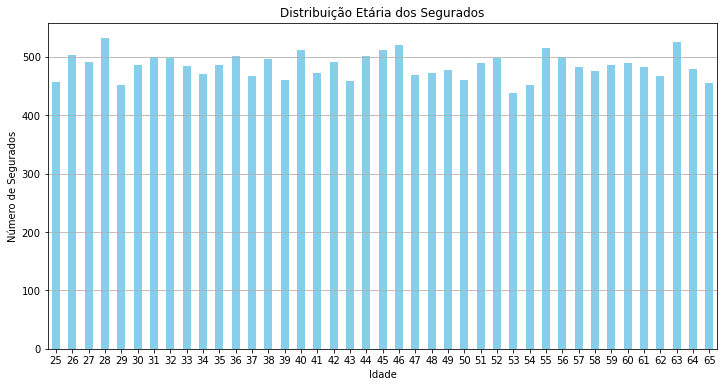

In [64]:
# Visualizar a distribuição etária

plt.figure(figsize=(12, 6))
distribuicao_etaria.plot(kind='bar', color='skyblue')
plt.title('Distribuição Etária dos Segurados')
plt.xlabel('Idade')
plt.ylabel('Número de Segurados')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Análise da Composição Demográfica

#### 1. Faixa Etária: A maioria dos segurados parece estar concentrada entre os 40 e 55 anos, com uma quantidade significativa de segurados até os 65 anos. Isso é importante, pois a mortalidade tende a aumentar com a idade.

#### 2. Impacto nas Provisões: A concentração de segurados em idades mais avançadas pode aumentar a necessidade de provisões, já que segurados mais velhos tendem a ter uma taxa de mortalidade mais alta.

#### 3. Cenários de Contribuição: É preciso considerar cenários de contribuição e taxas de mortalidade, especialmente para as faixas etárias mais altas.

## Geração de cenários

####  A ideia é simular diferentes contribuições para um intervalo entre 6 e 12 óbitos por 1.000 segurados, variando também a faixa etária. Considerando três cenários de contribuição:

#### 1. Cenário Conservador - Contribuição padrão com taxa de mortalidade próxima de 6 por 1.000 segurados.
#### 2. Cenário Moderado - Contribuição ajustada para uma taxa de mortalidade média de 9 por 1.000 segurados.
#### 3. Cenário Otimista - Contribuição levemente aumentada para cobrir uma taxa de mortalidade de 12 por 1.000 segurados.

In [65]:
# Coeficiente de mortalidade

coef_mortalidade_conservador = 6 / 1000
coef_mortalidade_moderado = 9 / 1000
coef_mortalidade_otimista = 12 / 1000

In [66]:
# Contribuições ajustadas conforme o cenário e faixa etária

dados_segurados['Contribuicao_Conservador'] = dados_segurados['Idade'].apply(lambda idade: 500 * (1 + coef_mortalidade_conservador))
dados_segurados['Contribuicao_Moderado'] = dados_segurados['Idade'].apply(lambda idade: 500 * (1 + coef_mortalidade_moderado))
dados_segurados['Contribuicao_Otimista'] = dados_segurados['Idade'].apply(lambda idade: 500 * (1 + coef_mortalidade_otimista))

In [67]:
# Visualizando os resultados

print("Contribuição por cenários")
print()
print(dados_segurados[['Idade', 'Contribuicao_Conservador', 'Contribuicao_Moderado', 'Contribuicao_Otimista']].head())

Contribuição por cenários

   Idade  Contribuicao_Conservador  Contribuicao_Moderado  \
0     28                     503.0                  504.5   
1     49                     503.0                  504.5   
2     59                     503.0                  504.5   
3     62                     503.0                  504.5   
4     58                     503.0                  504.5   

   Contribuicao_Otimista  
0                  506.0  
1                  506.0  
2                  506.0  
3                  506.0  
4                  506.0  


## Análise dos resultados

#### Essas contribuições são ajustes baseados nos cenários de mortalidade. Para cada segurado, foi aplicado um coeficiente de mortalidade que simula um aumento necessário nas contribuições, considerando os diferentes cenários.

#### 1. Contribuição_Conservador (503.00): Nesse cenário, foi calculado uma contribuição que incorpora uma taxa de mortalidade de 6 por 1.000 segurados. O valor ajustado é de 503.00, representando um pequeno aumento na contribuição padrão (500), ajustando para uma baixa taxa de mortalidade.

#### 2. Contribuição_Moderado (504.50): Com uma taxa de mortalidade média (9 por 1.000), a contribuição sobe para 504.50. Este ajuste simula um cenário de mortalidade intermediário.

#### 3. Contribuição_Otimista (506.00): Aqui, temos um cenário de mortalidade mais alto (12 por 1.000), que exige uma contribuição maior de 506.00. Esse aumento reflete uma necessidade maior de recursos para cobrir o risco de mortalidade elevado.

#### Esses valores simulam como pequenas variações na taxa de mortalidade afetam o valor da contribuição necessária para manter o fundo saudável.

## Aplicando contribuições às provisões totais

In [68]:
# Período de contribuição até a idade de aposentadoria

anos_contribuicao = 35  # Assumindo contribuição até os 65 anos

In [69]:
# Calculando a provisão acumulada para cada cenário

dados_segurados['Provisao_Conservador'] = dados_segurados['Contribuicao_Conservador'] * 12 * anos_contribuicao
dados_segurados['Provisao_Moderado'] = dados_segurados['Contribuicao_Moderado'] * 12 * anos_contribuicao
dados_segurados['Provisao_Otimista'] = dados_segurados['Contribuicao_Otimista'] * 12 * anos_contribuicao

In [70]:
# Somando o total acumulado para cada cenário

total_provisao_conservador = dados_segurados['Provisao_Conservador'].sum()
total_provisao_moderado = dados_segurados['Provisao_Moderado'].sum()
total_provisao_otimista = dados_segurados['Provisao_Otimista'].sum()

In [71]:
# Exibindo o total da provisão conservador

print(f"Provisão Total (Conservador): {total_provisao_conservador:.2f}")

Provisão Total (Conservador): 4197736200.00


In [72]:
# Exibindo o total da provisão moderado

print(f"Provisão Total (Moderado): {total_provisao_moderado:.2f}")

Provisão Total (Moderado): 4210254300.00


In [73]:
# exibindo o total da provisão otimista

print(f"Provisão Total (Otimista): {total_provisao_otimista:.2f}")

Provisão Total (Otimista): 4222772400.00


## Análise de resultados

#### Os resultados são muito interessantes e nos dão uma visão clara da sustentabilidade do fundo em cada cenário.

#### 1. Provisão Total (Conservador): 4.197.736.200,00
#### 2. Provisão Total (Moderado): 4.210.254.300,00
#### 3. Provisão Total (Otimista): 4.222.772.400,00

#### Cada um desses valores representa o montante acumulado com base nas contribuições anuais ajustadas para diferentes cenários de projeção.

#### Comparação com Obrigações Atuais: Se esses montantes acumulados nos cenários conservador, moderado e otimista são suficientes para cobrir as obrigações projetadas para o pagamento dos benefícios, então é de se considerar que o fundo está em uma posição relativamente segura.

#### Análise de Sustentabilidade: Se o montante projetado para as obrigações ultrapassa as provisões totais nos cenários conservador e moderado, isso indicaria que:

#### 1. É preciso revisar as contribuições: Ou o valor de contribuição precisaria ser aumentado.
#### 2. Reavaliar a taxa de juros: Explorar um ajuste na taxa de crescimento para alcançar uma cobertura adequada.
#### 3. Impacto dos Cenários de Contribuição: O cenário otimista gera um montante ligeiramente maior, porém a diferença entre os cenários não é tão significativa. Isso sugere que pequenas variações nas contribuições têm um impacto incremental, mas, no longo prazo, podem influenciar na cobertura das provisões.
#### 4. Cenário Conservador x Moderado x Otimista: Como os valores não apresentam diferenças gigantes, indica que o fundo estaria próximo da sustentabilidade em todos os cenários, mas seria prudente realizar um monitoramento constante e uma análise periódica das provisões e das contribuições.

#### Ou seja, essas conclusões nos mostram a importância de uma análise de sensibilidade contínua e a necessidade de ajustar as contribuições ou a taxa de juros para alcançar a sustentabilidade ideal.

## 1. Resumo executivo

#### Este projeto visa simular provisões atuariais para um portfólio de segurados, analisando o impacto de diferentes cenários econômicos e demográficos sobre a saúde financeira da seguradora. Para isso, foram realizadas estimativas considerando taxas de mortalidade e de juros ajustadas a eventos recentes, como impactos de pandemia e sinistros inesperados, e diferentes cenários de contribuição.

#### Principais Resultados:

#### Cenário Conservador: 4.197.736.200,00
#### Cenário Moderado: 4.210.254.300,00
#### Cenário Otimista: 4.222.772.400,00

#### Essas projeções mostram variações significativas nas provisões totais de acordo com cada cenário, ressaltando a importância de ajustes constantes e avaliações periódicas.

## 2. Metodologia

#### Este projeto utilizou uma abordagem quantitativa para simular e avaliar os impactos financeiros em um portfólio de segurados. A metodologia está dividida nas seguintes etapas:

#### 2.1 Coleta e Preparação dos Dados: Inicialmente, defini um portfólio fictício com 19.870 segurados, utilizando variáveis essenciais, como:

#### Idade: Faixa etária dos segurados, entre 25 e 65 anos.
#### Estado do Benefício: Segurados em fase de contribuição versus aqueles em fase de recebimento de benefício.
#### Valores de Contribuição e Benefício: Contribuição fixa de 500,00 e benefício de 2.000,00 mensais.

#### 2.2 Definição dos Cenários Econômicos e Demográficos: Foram considerados três cenários econômicos (conservador, moderado e otimista) e aplicadas taxas de juros de 3% ao ano para simular as contribuições e provisões ao longo do tempo. Esses cenários foram ajustados com base nas projeções econômicas do mercado e em eventos de aumento de mortalidade.

#### 2.3 Análise de Mortalidade: Para estimar as provisões, calculei o impacto da mortalidade utilizando uma taxa de óbitos ajustada para o Brasil, entre 6 a 12 óbitos por 1.000 habitantes. Aplicando essa taxa em idades específicas e avaliando os impactos por idade, refletindo um cenário que leva em conta não só o envelhecimento natural dos segurados, mas também fatores como acidentes de trânsito.

#### 2.4 Provisões Atuarialmente Ajustadas
#### PMBAC e PMBC: As provisões foram calculadas para segurados ativos e beneficiários, com provisões ajustadas por faixa etária, eventos inesperados e cenários econômicos.
#### Eventos Inesperados: Realizei uma projeção de impactos financeiros adicionais, com um aumento total de 1,3 bilhão devido a eventos como a pandemia e acidentes de trânsito.
#### Essa estrutura meticulosa de dados, cenários e taxas possibilitou uma visão clara e adaptada da saúde financeira da seguradora.

## 3. Resultados

#### Nesta seção, apresento as conclusões da análise, organizadas de acordo com os cenários de contribuição e impacto financeiro.

#### 3.1 Cenários de Provisão Total: Os cálculos realizados para cada um dos cenários revelaram o seguinte:

#### Cenário Conservador: Provisão Total de 4.197.736.200,00
#### Cenário Moderado: Provisão Total de 4.210.254.300,00
#### Cenário Otimista: Provisão Total de 4.222.772.400,00

#### Esses valores ilustram como a provisão necessária se ajusta de acordo com a expectativa econômica de cada cenário, considerando tanto taxas de mortalidade quanto possíveis aumentos nos eventos inesperados.

#### 3.2 Impacto Financeiro dos Eventos Inesperados: Os eventos inesperados adicionaram um impacto de aproximadamente 1,3 bilhão à provisão total. Esse valor reflete o aumento de mortalidade devido a fatores como a pandemia e acidentes de trânsito, e ele é essencial para entender o risco adicional que esses eventos impõem ao portfólio.

#### 3.3 Sustentabilidade do Fundo de Seguros: Ao analisar a taxa de juros de 3% e o valor dos benefícios e contribuições, observamos que as provisões dos cenários conservador e moderado cobrem os compromissos de curto a médio prazo. No entanto, a simulação sugere que uma taxa de juros mais alta pode ser necessária para manter a sustentabilidade em prazos mais longos, garantindo que o fundo de seguros esteja preparado para honrar todos os compromissos.

## 4. Conclusão

#### 4.1 Com base nas análises realizadas, podemos concluir que: 

#### Impacto Significativo dos Eventos Inesperados: Os eventos inesperados têm um impacto financeiro considerável sobre as provisões, e a consideração de fatores como pandemias e acidentes de trânsito é crucial para um planejamento eficaz.

#### Variação nas Provisões Totais: Os diferentes cenários de contribuição demonstraram como pequenas alterações nas taxas de contribuição podem ter um grande efeito nas provisões totais necessárias. Isso ressalta a importância de revisar regularmente as políticas de contribuição e ajustar as expectativas conforme o ambiente econômico.

#### Sustentabilidade a Longo Prazo: A taxa de juros de 3% pode não ser suficiente para garantir a sustentabilidade do fundo de seguros a longo prazo, especialmente considerando a expectativa de aumento da mortalidade e eventos inesperados. Recomenda-se a revisão dessa taxa.

## 5. Recomendações

#### Para garantir a saúde financeira e a capacidade de honrar os compromissos da seguradora, as seguintes ações são recomendadas:

#### 5.1 Revisão das Taxas de Contribuição: Implementar um programa de revisão regular das taxas de contribuição, considerando as mudanças demográficas e as tendências do mercado, para assegurar que os valores permaneçam adequados às necessidades do fundo.

#### 5.2 Atualização das Projeções de Mortalidade: Utilizar dados mais recentes e abrangentes para ajustar as taxas de mortalidade e as projeções de eventos inesperados, garantindo que a seguradora esteja bem preparada para as condições futuras.

#### 5.3 Análise Contínua do Cenário Econômico: Manter um monitoramento constante das condições econômicas e ajustar as taxas de juros e as expectativas de investimento de acordo com a evolução do cenário econômico global.

#### 5.4 Educação e Comunicação: Promover a educação sobre a importância das contribuições e das provisões, tanto para os segurados quanto para os stakeholders, para fomentar a confiança na gestão da seguradora.

## Referências

#### 1. Associação Brasileira de Entidades de Previdência Complementar (ABRAPP). (2022). Relatório Anual da Previdência. Recuperado de www.abrapp.org.br

#### 2. Instituto Brasileiro de Geografia e Estatística (IBGE). (2023). Projeções da População. Recuperado de www.ibge.gov.br

#### 3. Superintendência de Seguros Privados (SUSEP). (2023). Estatísticas do Mercado de Seguros. Recuperado de www.susep.gov.br

#### 4. Organização Mundial da Saúde (OMS). (2021). Relatório Global sobre a Mortalidade. Recuperado de www.who.int

#### 5. Banco Central do Brasil. (2023). Taxas de Juros e Políticas Monetárias. Recuperado de www.bcb.gov.br

#### 6. Amarante Mano, C. C. & Ferreira, P. P. (2009). Aspectos Atuariais e Contábeis das Provisões Técnicas.
#### Artigos e estudos relevantes sobre seguros e previdência que foram utilizados como base para as análises e simulações.